In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2020-02-05 20:51:36--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  39.3MB/s    in 7.8s    

2020-02-05 20:51:44 (22.3 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [3]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-02-05 20:51:45--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  16.2MB/s    in 4.8s    

2020-02-05 20:51:50 (12.8 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
training_data = sio.loadmat('train_32x32.mat')

In [0]:
x_train = training_data['X']
y_train = training_data['y']

Digit Label: [5]


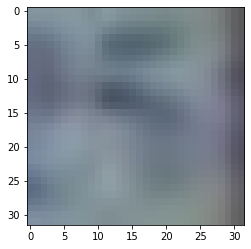

In [6]:
image_index = 5
plt.imshow(x_train[:,:,:,image_index])
print(f'Digit Label: {y_train[image_index]}')

In [7]:
y_train[52]

array([10], dtype=uint8)

In [0]:
y_train2 = np.where(y_train==10, 0, y_train)

In [9]:
y_train2[52]

array([0], dtype=uint8)

In [10]:
# This code downloads the coco dataset from Amazon S3 in parallel.
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Finished downloading train2017.zip . Starting to unzip.
Finished unzipping train2017.zip
Done transferring all datasets


In [0]:
from pycocotools.coco import COCO
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [0]:
ann_file = 'annotations/person_keypoints_train2017.json'

In [13]:
coco = COCO(ann_file)

loading annotations into memory...
Done (t=16.60s)
creating index...
index created!


In [17]:
categories = coco.loadCats(coco.getCatIds())
category_names = [category['name'] for category in categories]
print(', '.join(category_names))

person


In [20]:
coco.getCatIds()

[1]

In [0]:
image_ids = coco.getImgIds(catIds=coco.getCatIds())

In [0]:
sample_img_id = image_ids[50]

In [59]:
sample_img_id

262235

In [0]:
image = coco.loadImgs(ids=[sample_img_id])[0]

In [61]:
image

{'coco_url': 'http://images.cocodataset.org/train2017/000000262235.jpg',
 'date_captured': '2013-11-24 09:46:00',
 'file_name': '000000262235.jpg',
 'flickr_url': 'http://farm1.staticflickr.com/15/21730223_66fc69407d_z.jpg',
 'height': 640,
 'id': 262235,
 'license': 4,
 'width': 480}

In [62]:
image['coco_url']

'http://images.cocodataset.org/train2017/000000262235.jpg'

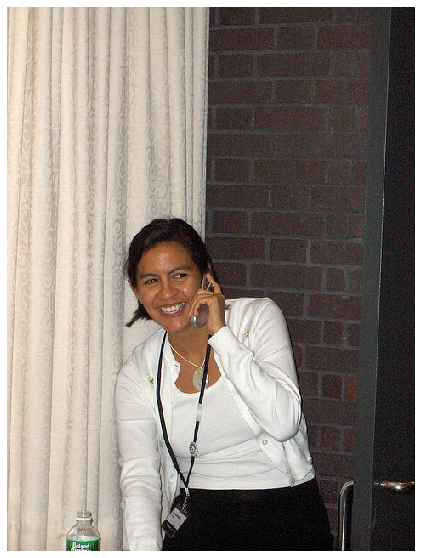

In [63]:
read_image = io.imread(image['coco_url'])
plt.axis('off')
plt.imshow(read_image)
plt.show()

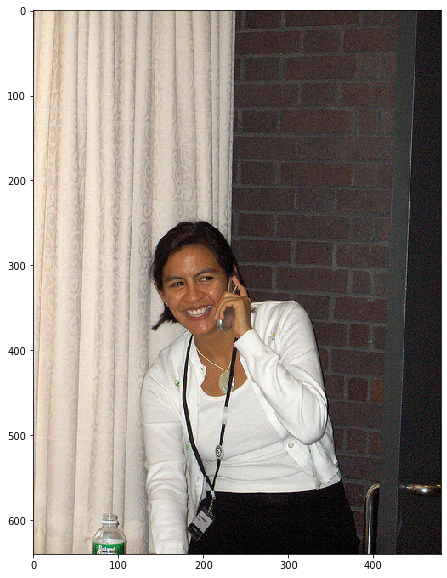

0

In [64]:
plt.imshow(read_image)
plt.show()
ann_ids = coco.getAnnIds(imgIds=image['id'], catIds=categories, iscrowd=None)
anns = coco.loadAnns(ann_ids)
coco.showAnns(anns)